# Persian Spotify Analysis
Alright, listen up folks! We're about to dive into some serious data analysis and machine learning. We'll start with some EDA to get to know the data, and then we'll use machine learning to extract some juicy insights. So, let's not waste any time and get this journey started!

<div align="center">
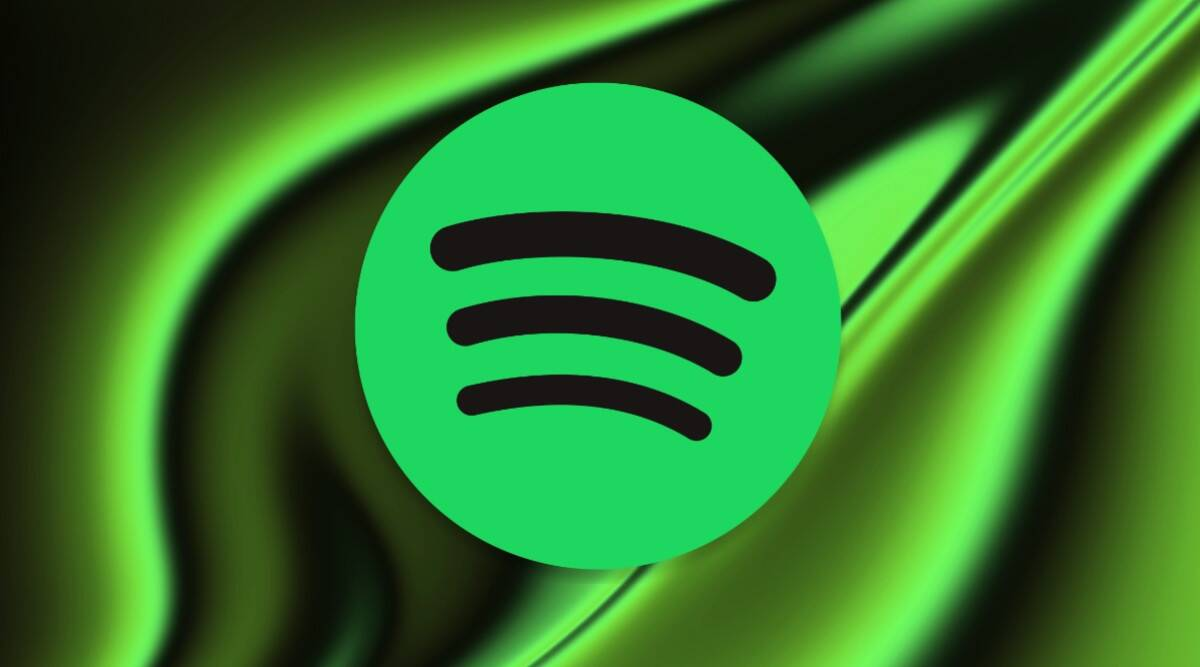
</div>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix
)
from pprint import pprint 
import copy
from sklearn.impute import SimpleImputer

In [2]:
%pwd

'e:\\Uni\\Sem 8\\Data Mining\\project'

# Load Spotify Dataset (CSV file)

In [35]:
spotify_df = pd.read_csv('Spotfiy_Persian_Artists.csv')
spotify_df.describe()

,disc_number,duration_ms,popularity,track_number,album_total_tracks,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,10632.000000,1.063200e+04,931.000000,10632.000000,931.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000
mean,1.069225,2.888011e+05,20.113856,5.576279,9.707841,1981.687453,0.510869,0.496408,5.205982,-10.070847,0.373965,0.069843,0.609586,0.127399,0.193231,0.450537,119.381223,3.666384
std,0.386374,1.695220e+05,10.415865,4.533367,6.744375,232.376793,0.172341,0.241768,3.635221,4.605740,0.483877,0.071078,0.317795,0.284277,0.154764,0.239068,29.831699,0.637143
min,1.000000,3.996000e+03,0.000000,1.000000,1.000000,0.000000,0.000000,0.000975,0.000000,-37.404000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.035690e+05,13.000000,2.000000,5.000000,2005.000000,0.372000,0.298000,2.000000,-12.665750,0.000000,0.036100,0.332000,0.000000,0.095800,0.256750,95.114750,3.000000
50%,1.000000,2.536180e+05,20.000000,5.000000,10.000000,2010.000000,0.497000,0.489000,5.000000,-9.067000,0.000000,0.044900,0.725000,0.000088,0.133000,0.421000,120.076000,4.000000
75%,1.000000,3.337745e+05,28.000000,8.000000,12.000000,2016.000000,0.652000,0.693000,9.000000,-6.617750,1.000000,0.067225,0.882000,0.014900,0.250000,0.633000,138.032000,4.000000
max,4.000000,3.978450e+06,48.000000,32.000000,55.000000,2020.000000,0.964000,0.998000,11.000000,-0.626000,1.000000,0.939000,0.996000,0.995000,0.992000,0.980000,219.960000,5.000000


In [4]:
spotify_df.columns

Index(['track_id', 'disc_number', 'duration_ms', 'explicit', 'track_name',
       'track_name_farsi', 'artist_name', 'artist_name_farsi', 'popularity',
       'track_number', 'album_href', 'album_id', 'album_name',
       'album_release_date', 'album_total_tracks', 'album_release_year',
       'track_href', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'key_name', 'mode_name',
       'key_mode'],
      dtype='object')

# EDA

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process. It helps us to better understand the given data, so that we can make sense out of it. If EDA is not done properly, it can hamper the further steps in the machine learning model building process. On the other hand, if done well, it may improve the efficacy of everything we do next. In order to perform EDA, we need to follow a systematic approach that involves several techniques. The following are some of the key steps involved in EDA:

1. Data Sourcing: This is the very first step of EDA, where we access data and load it into our system.

2. Data Cleaning: Once we have the data, we need to clean it by removing any inconsistencies, missing values, or outliers.

3. Univariate Analysis: In this step, we analyze each variable in isolation to understand its distribution, central tendency, and spread.

4. Bivariate Analysis: Here, we analyze the relationship between two variables to understand how they are related to each other.

5. Multivariate Analysis: This step involves analyzing the relationship between multiple variables to understand how they are related to each other.

By conducting EDA, we can turn an almost unusable dataset into a completely usable one. EDA helps to clean up a dataset and gives us a better understanding of the variables and the relationships between them. It is a creative process that involves generating questions about the data, searching for answers by visualizing, transforming, and modeling the data, and using what we learn to refine our questions and/or generate new ones.


In this section, we want to explore a bit dataset characteristics. To do so, you will answer specified questions below.

In [5]:
spotify_df.head()

,track_id,disc_number,duration_ms,explicit,track_name,track_name_farsi,artist_name,artist_name_farsi,popularity,track_number,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,key_mode
0,31iPeC6I0AiRW8InOxNKzm,1,446880,False,Ghazale Taze,NaN,Salar Aghili,سالار عقیلی,NaN,1,...,0.0299,0.839,0.000035,0.1360,0.330,131.913,3,C,minor,C minor
1,4Fi46ha8teWYTwk0b8fNPi,1,851920,False,Ayeeneye Hosn,NaN,Salar Aghili,سالار عقیلی,NaN,2,...,0.0414,0.970,0.000360,0.0812,0.346,105.634,4,F,major,F major
2,0lQAe6EslKA7CUsS7SCW6Q,1,293160,False,Tarke Eshgh,NaN,Salar Aghili,سالار عقیلی,NaN,3,...,0.0349,0.664,0.002070,0.1100,0.501,94.651,5,F,minor,F minor
3,6dAFmJdVsKk5ksCpGqnKgO,1,648720,False,Moghbacheye Bade Foroosh,NaN,Salar Aghili,سالار عقیلی,NaN,4,...,0.0451,0.915,0.006580,0.2120,0.445,110.967,5,D,minor,D minor
4,4VSDJGyEdSMB8UL4fDSCvv,1,273480,False,Bigharar,NaN,Salar Aghili,سالار عقیلی,NaN,5,...,0.0334,0.657,0.000008,0.1200,0.410,148.053,1,C,minor,C minor


In [6]:
spotify_df.columns

Index(['track_id', 'disc_number', 'duration_ms', 'explicit', 'track_name',
       'track_name_farsi', 'artist_name', 'artist_name_farsi', 'popularity',
       'track_number', 'album_href', 'album_id', 'album_name',
       'album_release_date', 'album_total_tracks', 'album_release_year',
       'track_href', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'key_name', 'mode_name',
       'key_mode'],
      dtype='object')

## Q: Get number of songs by each of the artists in descending order

In [7]:
# To be completed
artist_counts = spotify_df.groupby('artist_name')['track_name'].count()
artist_counts_sorted = artist_counts.sort_values(ascending=False)
artist_counts_sorted


artist_name
Mohammadreza Shajarian    554
Hossein Alizadeh          545
Reza Sadeghi              507
Dariush                   465
Alireza Eftekhari         439
                         ... 
Nasser Abdollahi           22
Mohammad Golriz            17
Ebrahim Monsefi            16
Farman Fathalian           10
Koveyti Poor                9
Name: track_name, Length: 69, dtype: int64

## Q: Get the average duration of songs by each of the artists in minutes

In [32]:
# To be completed
average_duration = spotify_df.groupby('artist_name')['duration_ms'].mean() / 60
average_duration

artist_name
Abbas Ghaderi            5074.705000
Abdolhosein Mokhtabad    6228.769497
Afshin Moghaddam         4100.779861
Ali Lohrasbi             3602.079141
Ali Zand Vakili          4854.786195
                            ...     
Siavash Ghomayshi        4341.581529
Sirvan Khosravi          4352.528939
Soheil Nafissi           3063.580435
Tohi                     3523.407813
Xaniar Khosravi          3934.065152
Name: duration_ms, Length: 69, dtype: float64

## Q: list of artist's unique names

In [33]:
# To be completed
spotify_df['artist_name'].unique()

array(['Salar Aghili', 'Mohsen Yeganeh', 'Mehdi Yarrahi',
       'Mohammadreza Shajarian', 'Morteza Pashaei', 'Hesameddin Seraj',
       'Mohammad Esfahani', 'Mohsen Chavoshi', 'Reza Sadeghi',
       'Abdolhosein Mokhtabad', 'Alireza Assar', 'Roozbeh Nematollahi',
       'Hossein Alizadeh', 'Peyman Yazdanian', 'Kayhan Kalhor',
       'Siavash Ghomayshi', 'Benyamin Bahadori', 'Alireza Eftekhari',
       'Majid Akhshabi', 'Faramarz Aslani', 'Iraj Bastami',
       'Ehsan Khajeh Amiri', 'Alireza Ghorbani', 'Parviz Meshkatian',
       'Mohammad Reza Lotfi', 'Dang Show', 'Nasser Abdollahi',
       'Soheil Nafissi', 'Farhad Mehrad', 'Afshin Moghaddam',
       'Koveyti Poor', 'Mohammad Golriz', 'Abbas Ghaderi',
       'Javad Yassari', 'Sattar', 'Mohsen Sharifian', 'Babak Jahanbakhsh',
       'Mazyar Fallahi', 'Mohammad Alizadeh', 'Farzad Farzin',
       'Ali Zand Vakili', 'Amirabbas Golab', 'Hamid Askari',
       'Mohsen Namjoo', 'Hamed Homayoun', 'Kaveh Deylami', 'Hatam Asgari',
       'Hamid

## Q: Plot average duration of tracks by year

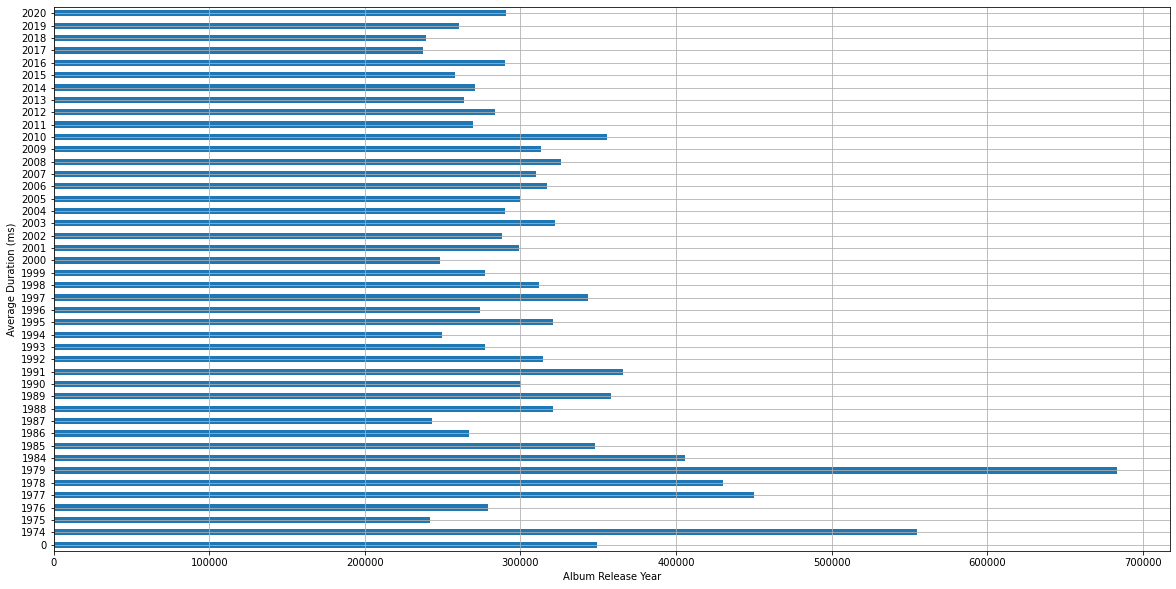

In [34]:
# To be completed
average_duration_by_year = spotify_df.groupby('album_release_year')['duration_ms'].mean()
plt.figure(figsize=(20, 10))
average_duration_by_year.plot(kind='barh')
plt.xlabel('Album Release Year')
plt.ylabel('Average Duration (ms)')
plt.grid(True)
plt.show()


## Q: Plot average loudness of tracks by year

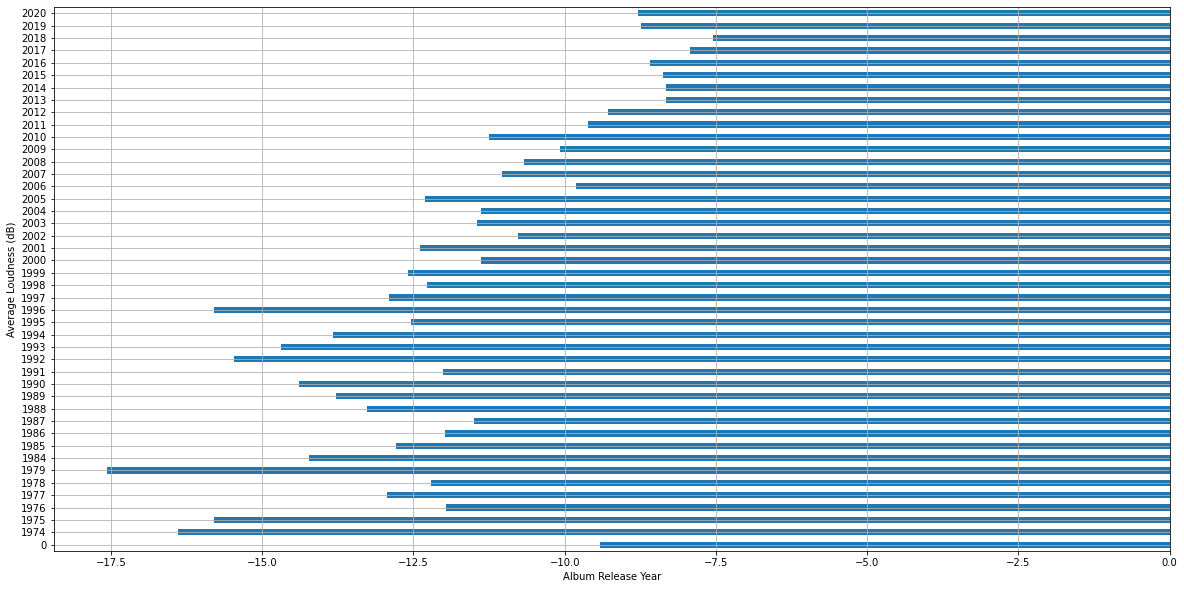

In [35]:
# To be completed
average_duration_by_year = spotify_df.groupby('album_release_year')['loudness'].mean()
plt.figure(figsize=(20, 10))
average_duration_by_year.plot(kind='barh')
plt.xlabel('Album Release Year')
plt.ylabel('Average Loudness (dB)')
plt.grid(True)
plt.show()

## Q: Music attributes of songs over the years


In [36]:
# the columns that we are interseted in
target_cols = ["acousticness","danceability","energy","speechiness","liveness","valence"]

# To be completed
music_attributes = ['duration_ms', 'loudness']

## Q: Plot top 10 popular tracks (Bar Chart)

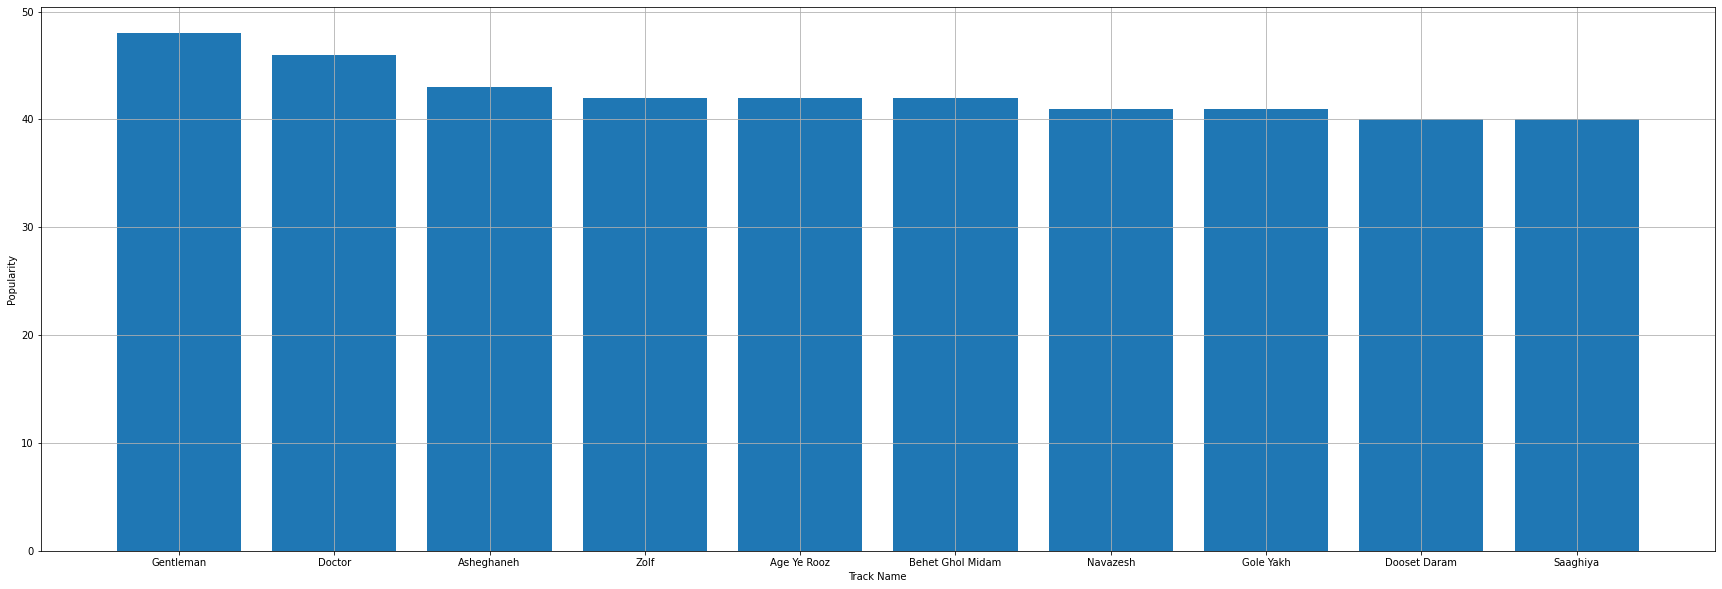

In [7]:
# To be completed
top10_popular_tracks = spotify_df.sort_values(by='popularity', ascending=False).head(11)
# top10_popular_tracks = spotify_df.sort_values(by='popularity', ascending=False).head(10)
# print(top10_popular_tracks)
# print(top10_popular_tracks1)
plt.figure(figsize=(30, 10))
plt.bar( top10_popular_tracks['track_name'], top10_popular_tracks['popularity'])
plt.xlabel('Track Name')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

## Q: Plot top 10 popular artist (Bar Chart)

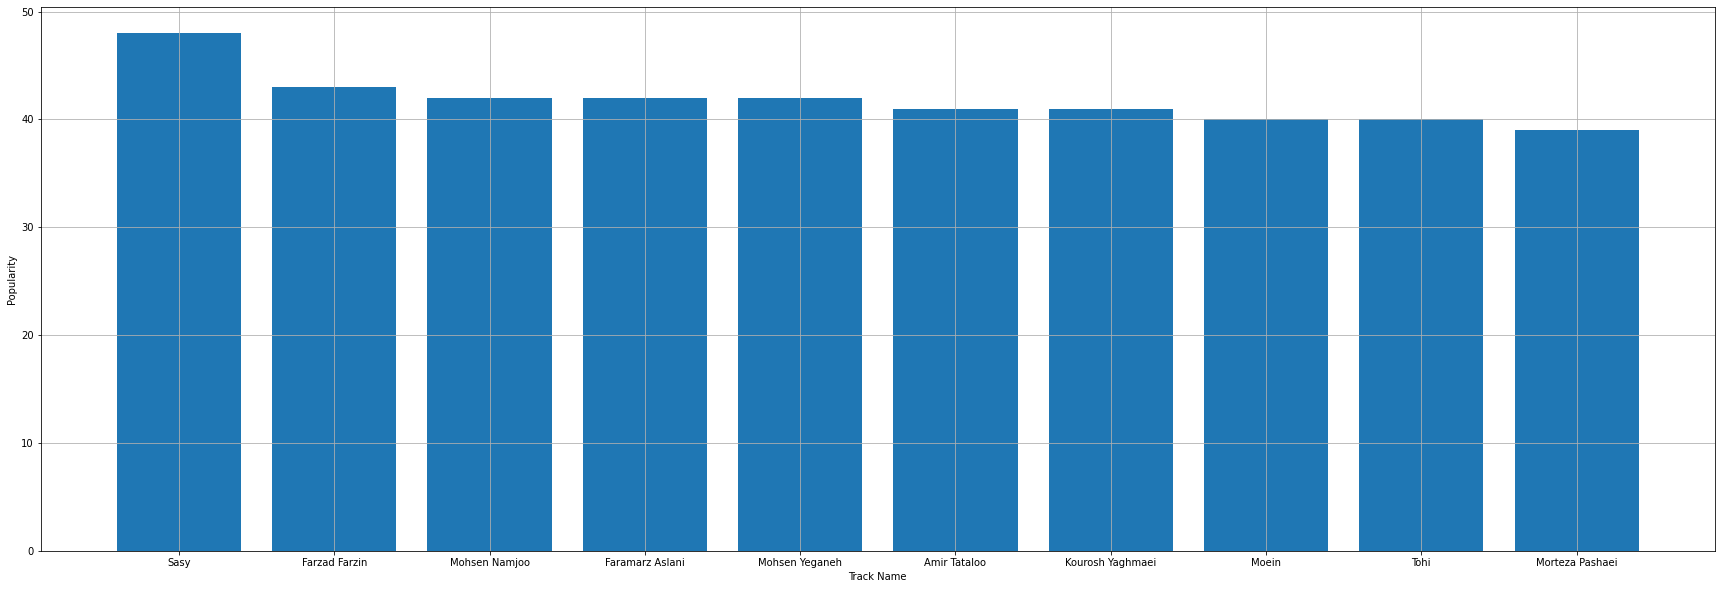

In [6]:
# To be completed
top10_popular_tracks = spotify_df.sort_values(by='popularity', ascending=False).head(16)
plt.figure(figsize=(30, 10))
plt.bar( top10_popular_tracks['artist_name'], top10_popular_tracks['popularity'])
plt.xlabel('Track Name')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

## Q: Plot correlation matrix's heatmap
What are the most correlated features with `duration_ms` and `popularity`?

In [49]:
# To be completed
columns_of_interests = ['duration_ms', 'popularity']
corrlation_matrix = spotify_df[columns_of_interests].corr()

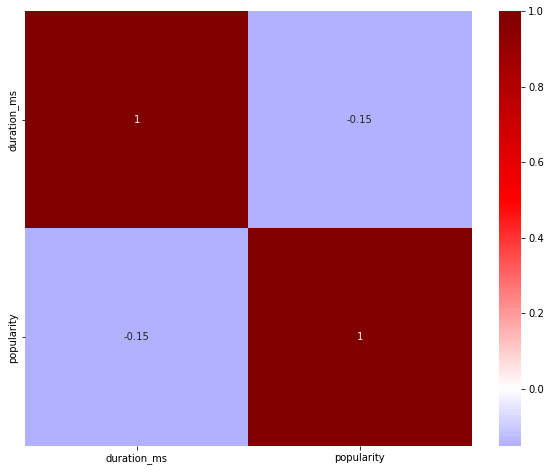

In [50]:
# To be completed
plt.figure(figsize=(10, 8))
sns.heatmap(corrlation_matrix, annot=True, cmap='seismic', center=0)
plt.show()

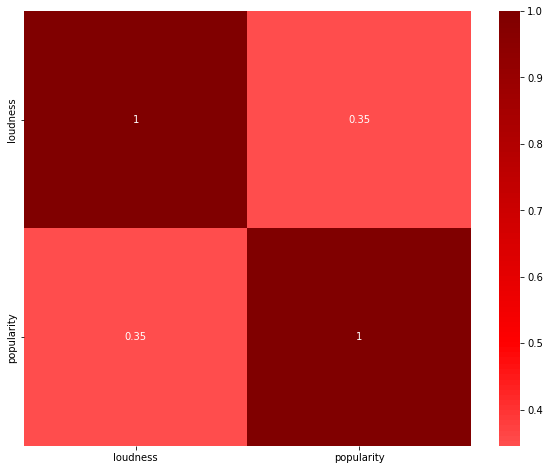

In [55]:
'Correlation Between artist name and popularity'
columns_of_interests = ['loudness', 'popularity']
corrlation_matrix = spotify_df[columns_of_interests].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corrlation_matrix, annot=True, cmap='seismic', center=0)
plt.show()

## Q: Plot box-plot for each feature 
Compare box-plot values of `energy` and `liveness`

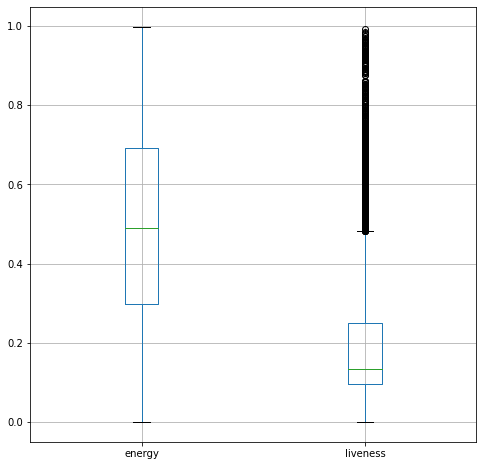

In [142]:
plt.figure(figsize=(8, 8))
box_plot = spotify_df.boxplot(column=['energy', 'liveness'])

## Q: Missing values 
How many `nan` values are there in each column?

In [8]:
# To be completed
attrs = spotify_df.columns

for attr in attrs:
    nan_count = spotify_df.isna()[attr].sum()
    print(f"Number of NaN elements for {attr} attribute are: {nan_count}")


Number of NaN elements for track_id attribute are: 0
Number of NaN elements for disc_number attribute are: 0
Number of NaN elements for duration_ms attribute are: 0
Number of NaN elements for explicit attribute are: 0
Number of NaN elements for track_name attribute are: 0
Number of NaN elements for track_name_farsi attribute are: 10020
Number of NaN elements for artist_name attribute are: 0
Number of NaN elements for artist_name_farsi attribute are: 0
Number of NaN elements for popularity attribute are: 9701
Number of NaN elements for track_number attribute are: 0
Number of NaN elements for album_href attribute are: 9701
Number of NaN elements for album_id attribute are: 0
Number of NaN elements for album_name attribute are: 0
Number of NaN elements for album_release_date attribute are: 0
Number of NaN elements for album_total_tracks attribute are: 9701
Number of NaN elements for album_release_year attribute are: 0
Number of NaN elements for track_href attribute are: 0
Number of NaN el

# Handling nan values of dataframe
- Fill categorical features with "None"
- Fill numerical features with appropriate approach(mean, median or any imputation). Explain your choice.

In [9]:
# To be completed
attrs = ['album_href', 'key_name', 'mode_name', 'key_mode', 'track_name_farsi', 'album_total_tracks']
isna_spotify_df = spotify_df.isna()

attrs_median = {}
spotify_df1 = copy.deepcopy(spotify_df)

for attr in attrs[:4]:
    spotify_df1[attr] = spotify_df[attr].fillna(spotify_df[attr].mode().iloc[0])
#     spotify_df1[attr] = None # It cuases missing big part of the dataset


In [10]:
# To be completed
import warnings

for attr in attrs[5:5]:
    with warnings.catch_warnings():
        warnings.simplefilter('ignore', category=RuntimeWarning)
        spotify_df1[attr] = spotify_df[attr].fillna(spotify_df[attr].median())


# Determine your desired features here

In [11]:
music_feature_cols = [
    # To be completed
    'track_id','duration_ms', 'explicit', 'track_name',
       'artist_name', 'popularity',
       'album_release_year',
       'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'
    #    , 'key_name', 'mode_name',
    #    'key_mode'
]

In [193]:
# tracks_feature_df = spotify_df1[music_feature_cols].dropna()
tracks_feature_df = spotify_df1[music_feature_cols]
len(tracks_feature_df)


10632

## Feature Preprocessing
In this section, you should preprocess desired features to get suitable for using in machine learning models. 

In [194]:
# To be completed
from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler(random_state=0)
a, b = rus.fit_resample(X=tracks_feature_df.drop(columns='track_name'), y=tracks_feature_df['track_name'])
a

,track_id,duration_ms,explicit,artist_name,popularity,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,31iPeC6I0AiRW8InOxNKzm,446880,False,Salar Aghili,NaN,2020,0.437,0.390,0,-7.170,0,0.0299,0.839,0.000035,0.1360,0.330,131.913,3
1,4Fi46ha8teWYTwk0b8fNPi,851920,False,Salar Aghili,NaN,2020,0.379,0.146,5,-10.008,1,0.0414,0.970,0.000360,0.0812,0.346,105.634,4
2,0lQAe6EslKA7CUsS7SCW6Q,293160,False,Salar Aghili,NaN,2020,0.437,0.453,5,-5.392,0,0.0349,0.664,0.002070,0.1100,0.501,94.651,5
3,6dAFmJdVsKk5ksCpGqnKgO,648720,False,Salar Aghili,NaN,2020,0.488,0.138,2,-12.287,0,0.0451,0.915,0.006580,0.2120,0.445,110.967,5
4,4VSDJGyEdSMB8UL4fDSCvv,273480,False,Salar Aghili,NaN,2020,0.301,0.443,0,-5.702,0,0.0334,0.657,0.000008,0.1200,0.410,148.053,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219989,6mar8YT7tSNLcGOWRoQYG9,308036,False,Mohsen Namjoo,NaN,2019,0.611,0.403,2,-12.513,0,0.0450,0.619,0.000000,0.2500,0.672,127.185,4
219990,6mar8YT7tSNLcGOWRoQYG9,308036,False,Mohsen Namjoo,NaN,2019,0.611,0.403,2,-12.513,0,0.0450,0.619,0.000000,0.2500,0.672,127.185,4
219991,6mar8YT7tSNLcGOWRoQYG9,308036,False,Mohsen Namjoo,NaN,2019,0.611,0.403,2,-12.513,0,0.0450,0.619,0.000000,0.2500,0.672,127.185,4
219992,6mar8YT7tSNLcGOWRoQYG9,308036,False,Mohsen Namjoo,NaN,2019,0.611,0.403,2,-12.513,0,0.0450,0.619,0.000000,0.2500,0.672,127.185,4


In [195]:
numeric_spotify_df = tracks_feature_df.drop(columns=['track_name', 'artist_name', 'track_id', 'explicit'])

numeric_spotify_df = numeric_spotify_df.apply(pd.to_numeric)
scalar = StandardScaler().fit_transform(numeric_spotify_df)
numeric_spotify_df = pd.DataFrame(scalar, index=numeric_spotify_df.index, columns=numeric_spotify_df.columns)
numeric_spotify_df

,duration_ms,popularity,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.932542,NaN,0.164880,-0.428643,-0.440144,-1.432162,0.629863,-0.772888,-0.561985,0.721928,-0.448047,-0.369816,-0.504217,0.420102,-1.045944
1,3.321961,NaN,0.164880,-0.765201,-1.449424,-0.056665,0.013646,1.293849,-0.400182,1.134163,-0.446904,-0.723920,-0.437288,-0.460848,0.523636
2,0.025714,NaN,0.164880,-0.428643,-0.179551,-0.056665,1.015921,-0.772888,-0.491636,0.171232,-0.440888,-0.537822,0.211093,-0.829030,2.093217
3,2.123240,NaN,0.164880,-0.132704,-1.482515,-0.881964,-0.481195,-0.772888,-0.348124,0.961087,-0.425022,0.121278,-0.023160,-0.282070,2.093217
4,-0.090383,NaN,0.164880,-1.217813,-0.220915,-1.432162,0.948610,-0.772888,-0.512741,0.149205,-0.448140,-0.473204,-0.169569,0.961163,-4.185105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10627,0.641268,NaN,0.014256,-0.898663,0.010723,-0.331765,-0.159407,-0.772888,-0.346717,1.058639,-0.428962,1.032386,-0.228132,0.912152,2.093217
10628,19.074364,NaN,0.113238,-1.119167,-1.379105,-0.056665,-1.621347,-0.772888,-0.011856,1.171925,-0.232174,3.061378,-1.211161,-1.575654,-1.045944
10629,18.369602,NaN,0.113238,-1.728453,-1.151603,0.768633,-1.258088,1.293849,-0.490229,0.860389,-0.379924,0.450827,-1.303190,-1.097415,0.523636
10630,18.015808,NaN,0.113238,-1.560174,-0.795874,0.768633,-0.698108,1.293849,-0.463496,0.731369,0.336312,3.907869,-1.006189,-1.393289,-1.045944


In [196]:
non_numeric_df = tracks_feature_df[['track_name', 'artist_name', 'track_id', 'explicit']]
non_numeric_df

,track_name,artist_name,track_id,explicit
0,Ghazale Taze,Salar Aghili,31iPeC6I0AiRW8InOxNKzm,False
1,Ayeeneye Hosn,Salar Aghili,4Fi46ha8teWYTwk0b8fNPi,False
2,Tarke Eshgh,Salar Aghili,0lQAe6EslKA7CUsS7SCW6Q,False
3,Moghbacheye Bade Foroosh,Salar Aghili,6dAFmJdVsKk5ksCpGqnKgO,False
4,Bigharar,Salar Aghili,4VSDJGyEdSMB8UL4fDSCvv,False
...,...,...,...,...
10627,Zarbie Bayat Tork (Che Danestam),Shahram Nazeri,4pEbf7VQrO4StzbqdFOnr5,False
10628,Conserte Asatid,Shahram Nazeri,6umKGf6TO7aRXvJWkP6WSy,False
10629,Soofi Nameh,Shahram Nazeri,5KiMQApCqUVNObTO004MWI,False
10630,Saghi Nameh,Shahram Nazeri,4w1VKm2kjmA2Xz4YSMBfIn,False


In [197]:
le = LabelEncoder()


le.fit_transform(non_numeric_df['artist_name'].unique())
non_numeric_df[['artist_name']] = non_numeric_df[['artist_name']].apply(le.fit_transform)

le.fit_transform(non_numeric_df['track_name'].unique())
non_numeric_df[['track_name']] = non_numeric_df[['track_name']].apply(le.fit_transform)

le.fit_transform(non_numeric_df['track_id'].unique())
non_numeric_df[['track_id']] = non_numeric_df[['track_id']].apply(le.fit_transform)

le.fit_transform(non_numeric_df['explicit'].unique())
non_numeric_df[['explicit']] = non_numeric_df[['explicit']].apply(le.fit_transform)

non_numeric_df


<ipython-input-197-e4ddbed02723>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_numeric_df[['artist_name']] = non_numeric_df[['artist_name']].apply(le.fit_transform)
<ipython-input-197-e4ddbed02723>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_numeric_df[['track_name']] = non_numeric_df[['track_name']].apply(le.fit_transform)
<ipython-input-197-e4ddbed02723>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

,track_name,artist_name,track_id,explicit
0,2722,58,3900,0
1,600,58,5574,0
2,6515,58,1026,0
3,4493,58,8727,0
4,1201,58,5910,0
...,...,...,...,...
10627,7475,61,6308,0
10628,1577,61,9122,0
10629,6189,61,7019,0
10630,5503,61,6471,0


In [198]:
numeric_spotify_df = tracks_feature_df.drop(columns=['track_name', 'artist_name', 'track_id', 'explicit'])
tracks_feature_df = pd.concat([numeric_spotify_df, non_numeric_df], axis=1)
tracks_feature_df

,duration_ms,popularity,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_name,artist_name,track_id,explicit
0,446880,NaN,2020,0.437,0.390,0,-7.170,0,0.0299,0.839,0.000035,0.1360,0.3300,131.913,3,2722,58,3900,0
1,851920,NaN,2020,0.379,0.146,5,-10.008,1,0.0414,0.970,0.000360,0.0812,0.3460,105.634,4,600,58,5574,0
2,293160,NaN,2020,0.437,0.453,5,-5.392,0,0.0349,0.664,0.002070,0.1100,0.5010,94.651,5,6515,58,1026,0
3,648720,NaN,2020,0.488,0.138,2,-12.287,0,0.0451,0.915,0.006580,0.2120,0.4450,110.967,5,4493,58,8727,0
4,273480,NaN,2020,0.301,0.443,0,-5.702,0,0.0334,0.657,0.000008,0.1200,0.4100,148.053,1,1201,58,5910,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10627,397505,NaN,1985,0.356,0.499,4,-10.805,0,0.0452,0.946,0.005460,0.3530,0.3960,146.591,5,7475,61,6308,0
10628,3522173,NaN,2008,0.318,0.163,5,-17.538,0,0.0690,0.982,0.061400,0.6670,0.1610,72.379,3,1577,61,9122,0
10629,3402706,NaN,2008,0.213,0.218,8,-15.865,1,0.0350,0.883,0.019400,0.2630,0.1390,86.645,4,6189,61,7019,0
10630,3342733,NaN,2008,0.242,0.304,8,-13.286,1,0.0369,0.842,0.223000,0.7980,0.2100,77.819,3,5503,61,6471,0


In [199]:
lr = LinearRegression()
tracks_feature_df1 = copy.deepcopy(tracks_feature_df)
test_df = tracks_feature_df[tracks_feature_df['popularity'].isna()==True]
train_df = tracks_feature_df[tracks_feature_df['popularity'].isna()==False]
y = train_df['popularity']
# print(y)
train_df.drop('popularity', axis=1, inplace=True)
lr.fit(train_df, y)
test_df.drop('popularity', axis=1, inplace=True)
pred = lr.predict(test_df)
tracks_feature_df1.loc[tracks_feature_df['popularity'].isnull(), 'popularity']= pred


<ipython-input-199-90c3bba851a8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop('popularity', axis=1, inplace=True)
<ipython-input-199-90c3bba851a8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop('popularity', axis=1, inplace=True)


In [200]:
tracks_feature_df = tracks_feature_df1

## Visualize Dataset Features using Dimension Reduction models (e.g. PCA)

(10632, 2)


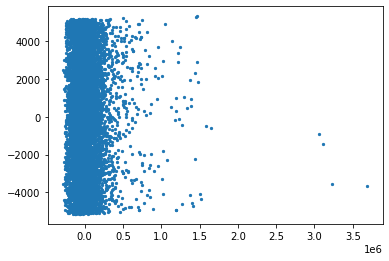

In [201]:
pca = PCA(n_components=2)
tracks_feature_visual = pca.fit_transform(tracks_feature_df.drop(['artist_name'], axis=1))
print(tracks_feature_visual.shape)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 1], s=5)
plt.show()

(10632, 3)


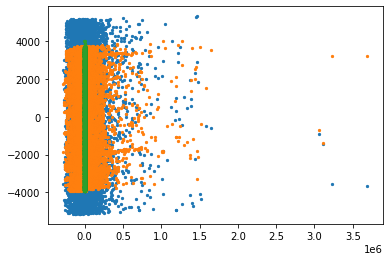

In [202]:
pca = PCA(n_components=3)
tracks_feature_visual = pca.fit_transform(tracks_feature_df.drop(['artist_name'], axis=1))
print(tracks_feature_visual.shape)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 1], s=5)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 2], s=5)
plt.scatter(tracks_feature_visual[:, 1], tracks_feature_visual[:, 2], s=5)
plt.show()

## Regression

In [184]:
# Set random seed to make results reproducible 
RANDOM_SEED = 42

In [305]:
df = tracks_feature_df
regression_features = [
    # Your desired features columns
   'duration_ms', 
   'explicit', 
   'track_name', 
   'artist_name',
   'album_release_year',
   'danceability', 
   'loudness', 
   'mode',
   'instrumentalness', 
   'valence', 
   'tempo', 
]
x=df.loc[:, regression_features].values
y=df.loc[:,'popularity'].values
print(x)
print(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=RANDOM_SEED)

[[4.468800e+05 0.000000e+00 2.722000e+03 ... 3.510000e-05 3.300000e-01
  1.319130e+02]
 [8.519200e+05 0.000000e+00 6.000000e+02 ... 3.600000e-04 3.460000e-01
  1.056340e+02]
 [2.931600e+05 0.000000e+00 6.515000e+03 ... 2.070000e-03 5.010000e-01
  9.465100e+01]
 ...
 [3.402706e+06 0.000000e+00 6.189000e+03 ... 1.940000e-02 1.390000e-01
  8.664500e+01]
 [3.342733e+06 0.000000e+00 5.503000e+03 ... 2.230000e-01 2.100000e-01
  7.781900e+01]
 [5.309200e+05 0.000000e+00 2.365000e+03 ... 4.710000e-05 3.860000e-02
  9.110600e+01]]
[ 22.64698498  14.71066413  24.26101656 ... -13.95312305 -10.02639711
  32.        ]


In this section, you should use `LinearRegression` class in scikit-learn library to implement regression algorithm. note that you should pass suitable parameters to get better results.

In [306]:
regressor = LinearRegression(
    # pass parameters here
    fit_intercept=True
)
regressor.fit(x_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

30.12484654028914
[-9.67367627e-06  1.36153720e+01 -5.90325187e-05  6.70617655e-02
 -5.23345351e-04  3.46422900e+00  7.06212621e-01 -2.71154053e+00
 -2.28185781e+00 -4.80825481e+00 -5.01404976e-03]


## Evaluate Regression Algorithm

In [307]:
y_pred = regressor.predict(x_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_output

,Actual,Predicted
0,13.000000,19.180559
1,21.982799,22.276643
2,24.088513,24.956391
3,19.618422,20.343794
4,14.513513,14.492518
...,...,...
3185,20.953190,20.882935
3186,12.000000,19.920191
3187,14.646908,15.090089
3188,19.574827,18.533248


In [308]:
#autograde
#Checking the accuracy of Linear Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.3352875997584992
Mean Squared Error: 8.611120981564527
Root Mean Squared Error: 2.9344711587549344


# Classification

## Prepare Labels

In [315]:
sonnati_artists = ['Salar Aghili', 'Mohammadreza Shajarian', 'Hesameddin Seraj',
       'Mohammad Esfahani', 'Abdolhosein Mokhtabad', 'Hossein Alizadeh', 
       'Kayhan Kalhor', 'Alireza Eftekhari', 'Iraj Bastami', 'Alireza Ghorbani', 
       'Parviz Meshkatian', 'Mohammad Reza Lotfi', 'Ali Zand Vakili', 'Kaveh Deylami', 
       'Hatam Asgari', 'Homayoun Shajarian', 'Shahram Nazeri']

## Add `is_sonnati` feature column 
Using `sonnati_artist` list, add new feature column `is_sonnati` that determines a song whether a song is sonnati

In [316]:
# To be completed
tracks_feature_df = spotify_df
tracks_feature_df['is_sonnati'] = tracks_feature_df['artist_name'].isin(sonnati_artists)

le.fit_transform(tracks_feature_df['is_sonnati'].unique())
tracks_feature_df[['is_sonnati']] = tracks_feature_df[['is_sonnati']].apply(le.fit_transform)

tracks_feature_df


,track_id,disc_number,duration_ms,explicit,track_name,track_name_farsi,artist_name,artist_name_farsi,popularity,track_number,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,key_mode,is_sonnati
0,31iPeC6I0AiRW8InOxNKzm,1,446880,False,Ghazale Taze,NaN,Salar Aghili,سالار عقیلی,NaN,1,...,0.839,0.000035,0.1360,0.3300,131.913,3,C,minor,C minor,1
1,4Fi46ha8teWYTwk0b8fNPi,1,851920,False,Ayeeneye Hosn,NaN,Salar Aghili,سالار عقیلی,NaN,2,...,0.970,0.000360,0.0812,0.3460,105.634,4,F,major,F major,1
2,0lQAe6EslKA7CUsS7SCW6Q,1,293160,False,Tarke Eshgh,NaN,Salar Aghili,سالار عقیلی,NaN,3,...,0.664,0.002070,0.1100,0.5010,94.651,5,F,minor,F minor,1
3,6dAFmJdVsKk5ksCpGqnKgO,1,648720,False,Moghbacheye Bade Foroosh,NaN,Salar Aghili,سالار عقیلی,NaN,4,...,0.915,0.006580,0.2120,0.4450,110.967,5,D,minor,D minor,1
4,4VSDJGyEdSMB8UL4fDSCvv,1,273480,False,Bigharar,NaN,Salar Aghili,سالار عقیلی,NaN,5,...,0.657,0.000008,0.1200,0.4100,148.053,1,C,minor,C minor,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10627,4pEbf7VQrO4StzbqdFOnr5,1,397505,False,Zarbie Bayat Tork (Che Danestam),NaN,Shahram Nazeri,شهرام ناظري,NaN,19,...,0.946,0.005460,0.3530,0.3960,146.591,5,E,minor,E minor,1
10628,6umKGf6TO7aRXvJWkP6WSy,1,3522173,False,Conserte Asatid,NaN,Shahram Nazeri,شهرام ناظري,NaN,1,...,0.982,0.061400,0.6670,0.1610,72.379,3,F,minor,F minor,1
10629,5KiMQApCqUVNObTO004MWI,1,3402706,False,Soofi Nameh,NaN,Shahram Nazeri,شهرام ناظري,NaN,1,...,0.883,0.019400,0.2630,0.1390,86.645,4,G#,major,G# major,1
10630,4w1VKm2kjmA2Xz4YSMBfIn,1,3342733,False,Saghi Nameh,NaN,Shahram Nazeri,شهرام ناظري,NaN,1,...,0.842,0.223000,0.7980,0.2100,77.819,3,G#,major,G# major,1


## Create Classification Dataset

In [320]:
classification_features = [
    # Your desired features columns
    # 'track_id', 'explicit', 'track_name', 'album_name', 'duration_ms',
    # 'danceability', 'energy', 'key', 'loudness', 'mode',
    # 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
    # 'valence', 'tempo', 'time_signature',
    'duration_ms', 
    'album_name',
    'explicit', 
    'track_name', 
    'album_release_year',
    'danceability', 
    'loudness', 
    'mode',
    'instrumentalness', 
    'valence', 
    'tempo', 
    'is_sonnati'
]

Preprocessing:

In [321]:
tracks_feature_df.columns

Index(['duration_ms', 'album_name', 'explicit', 'track_name', 'artist_name',
       'album_release_year', 'danceability', 'loudness', 'mode',
       'instrumentalness', 'valence', 'tempo', 'is_sonnati'],
      dtype='object')

In [322]:
tracks_feature_df = tracks_feature_df[classification_features]
non_numeric_features = ['track_name', 'explicit', 'album_name']

'Normalize Numerical Data '
numeric_spotify_df = tracks_feature_df.drop(columns=non_numeric_features)
numeric_spotify_df = numeric_spotify_df.apply(pd.to_numeric)
scalar = StandardScaler().fit_transform(numeric_spotify_df)
numeric_spotify_df = pd.DataFrame(scalar, index=numeric_spotify_df.index, columns=numeric_spotify_df.columns)

'Normalize Non-Numerical Data'
# non_numeric_df = tracks_feature_df[non_numeric_features]

# le = LabelEncoder()

# le.fit_transform(non_numeric_df['track_name'].unique())
# non_numeric_df[['track_name']] = non_numeric_df[['track_name']].apply(le.fit_transform)

# le.fit_transform(non_numeric_df['track_id'].unique())
# non_numeric_df[['track_id']] = non_numeric_df[['track_id']].apply(le.fit_transform)

# le.fit_transform(non_numeric_df['explicit'].unique())
# non_numeric_df[['explicit']] = non_numeric_df[['explicit']].apply(le.fit_transform)

# le.fit_transform(non_numeric_df['album_name'].unique())
# non_numeric_df[['album_name']] = non_numeric_df[['album_name']].apply(le.fit_transform)

# for nonn_feature in non_numeric_features:
#     le.fit_transform(non_numeric_df[nonn_feature].unique())
#     non_numeric_df[[nonn_feature]] = non_numeric_df[[nonn_feature]].apply(le.fit_transform)
#     print(non_numeric_df[[nonn_feature]])

numeric_spotify_df = tracks_feature_df.drop(columns=non_numeric_features)
tracks_feature_df = pd.concat([numeric_spotify_df, non_numeric_df], axis=1)
print(tracks_feature_df)

       duration_ms  album_release_year  danceability  loudness  mode  \
0           446880                2020         0.437    -7.170     0   
1           851920                2020         0.379   -10.008     1   
2           293160                2020         0.437    -5.392     0   
3           648720                2020         0.488   -12.287     0   
4           273480                2020         0.301    -5.702     0   
...            ...                 ...           ...       ...   ...   
10627       397505                1985         0.356   -10.805     0   
10628      3522173                2008         0.318   -17.538     0   
10629      3402706                2008         0.213   -15.865     1   
10630      3342733                2008         0.242   -13.286     1   
10631       530920                   0         0.308   -11.577     1   

       instrumentalness  valence    tempo  is_sonnati  track_name  \
0              0.000035   0.3300  131.913           1        2722 

In [323]:
tracks_feature_df.columns

Index(['duration_ms', 'album_release_year', 'danceability', 'loudness', 'mode',
       'instrumentalness', 'valence', 'tempo', 'is_sonnati', 'track_name',
       'artist_name', 'track_id', 'explicit'],
      dtype='object')

In [324]:
x = tracks_feature_df.reset_index().drop(columns=['is_sonnati']).values

y = tracks_feature_df.loc[:,'is_sonnati'].values

In [325]:
tracks_feature_df

,duration_ms,album_release_year,danceability,loudness,mode,instrumentalness,valence,tempo,is_sonnati,track_name,artist_name,track_id,explicit
0,446880,2020,0.437,-7.170,0,0.000035,0.3300,131.913,1,2722,58,3900,0
1,851920,2020,0.379,-10.008,1,0.000360,0.3460,105.634,1,600,58,5574,0
2,293160,2020,0.437,-5.392,0,0.002070,0.5010,94.651,1,6515,58,1026,0
3,648720,2020,0.488,-12.287,0,0.006580,0.4450,110.967,1,4493,58,8727,0
4,273480,2020,0.301,-5.702,0,0.000008,0.4100,148.053,1,1201,58,5910,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10627,397505,1985,0.356,-10.805,0,0.005460,0.3960,146.591,1,7475,61,6308,0
10628,3522173,2008,0.318,-17.538,0,0.061400,0.1610,72.379,1,1577,61,9122,0
10629,3402706,2008,0.213,-15.865,1,0.019400,0.1390,86.645,1,6189,61,7019,0
10630,3342733,2008,0.242,-13.286,1,0.223000,0.2100,77.819,1,5503,61,6471,0


In [326]:
print(f'{x.shape=}')
print(f'{y.shape=}')

x.shape=(10632, 13)
y.shape=(10632,)


## Choose a Model and Report the Evaluation Metrics

`fit_and_eval` function takes two parameters:
- scikit-learn classification model
- dataset object (that is a tuple of `x` and `y`) 


you should just instantiate your model and pass your desired parameters and then get the result of testing over test part of dataset.

In [327]:
#autograde
def fit_and_eval(model, dataset):
    """
    Train scikit-learn model on given dataset
    
    model: scikit-learn model
    dataset: tuple of x's and y's (whole data without any split)
    
    return:
        dict: evaluation metrics report
    """
    eval_metrics = {}
    x, y = dataset
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.3, random_state=RANDOM_SEED, shuffle=True
    )
    
    # train model
    classifier = make_pipeline(StandardScaler(), model)
    
    # ignore index column for training and inferencing
    classifier.fit(x_train[:, 1:], y_train)
    y_pred = classifier.predict(x_test[:, 1:])
    
    # export predictions to submit to kaggle
    pd.DataFrame({'id': x_test[:, 0].astype(int), 'predicted': y_pred}, dtype=str).to_csv('spotify_pred.csv', index=False)
    
    # evaluate model
    eval_metrics['acc'] = accuracy_score(y_test, y_pred)
    eval_metrics['precision'] = precision_score(y_test, y_pred)
    eval_metrics['recall'] = recall_score(y_test, y_pred)
    eval_metrics['f1'] = f1_score(y_test, y_pred)
    eval_metrics['confusion'] = confusion_matrix(y_test, y_pred)
    return eval_metrics

In [328]:
# here is an example
dataset = (x, y)
pprint(fit_and_eval(KNeighborsClassifier(n_neighbors=1), dataset))

{'acc': 0.7990595611285266,
 'confusion': array([[1752,  343],
       [ 298,  797]], dtype=int64),
 'f1': 0.7131991051454137,
 'precision': 0.6991228070175438,
 'recall': 0.7278538812785388}


In [329]:
#autograde
# the best model you want to be evaluated. Just pass do the same way as above cell
dataset = (x, y)
model = RandomForestClassifier()
pprint(fit_and_eval(model, dataset))

{'acc': 0.9420062695924765,
 'confusion': array([[2011,   84],
       [ 101,  994]], dtype=int64),
 'f1': 0.9148642429820525,
 'precision': 0.922077922077922,
 'recall': 0.9077625570776255}
